In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
df = pd.read_csv('cpu_temp_2018.csv', sep = '\t') #this file contains all the cpu_temp from 2018 onwards to May-3, 2020

In [3]:
df = df.sample(frac=0.1, random_state=101) #optional, per machine configuration
df.head()

,temp,year,month,day,hour,minute,second
13255007,59.0,2020,4,21,22,53,20
7773148,44.4,2019,4,30,15,49,15
6675982,48.7,2019,2,19,4,54,48
11209375,48.7,2019,12,10,22,11,48
1665597,48.2,2018,4,10,7,22,28


In [4]:
dummies = pd.get_dummies(df, columns = ['year','month','day','hour','minute','second'], 
                         prefix = ['year','month','day','hour','minute','second'], drop_first=True)

df = df.drop(['year', 'month','day','hour','minute','second', 'temp'],axis=1)
df = pd.concat([df,dummies],axis=1)


In [5]:
len(df)

1331006

In [7]:
X = df.drop('temp', axis=1).values
y = df['temp'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [11]:
model = Sequential()

model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss = 'mse', optimizer='adam')

model.fit(x = X_train, y=y_train, batch_size=256, epochs=25, validation_data=(X_test, y_test))

Train on 403048 samples, validate on 100762 samples
Epoch 1/100
403048/403048 [==============================] - 13s 31us/sample - loss: 2322.8519 - val_loss: 2248.3778
Epoch 2/100
403048/403048 [==============================] - 11s 27us/sample - loss: 2175.2877 - val_loss: 2103.8116
Epoch 3/100
403048/403048 [==============================] - 11s 27us/sample - loss: 2033.4748 - val_loss: 1964.6393
Epoch 4/100
403048/403048 [==============================] - 11s 27us/sample - loss: 1896.8428 - val_loss: 1830.4899
Epoch 5/100
403048/403048 [==============================] - 11s 27us/sample - loss: 1765.1604 - val_loss: 1701.2426
Epoch 6/100
403048/403048 [==============================] - 11s 27us/sample - loss: 1638.3573 - val_loss: 1576.8544
Epoch 7/100
403048/403048 [==============================] - 11s 27us/sample - loss: 1516.4000 - val_loss: 1457.3075
Epoch 8/100
403048/403048 [==============================] - 11s 26us/sample - loss: 1399.2835 - val_loss: 1342.5947
Epoch 9/100


In [12]:
losses = pd.DataFrame(model.history.history)

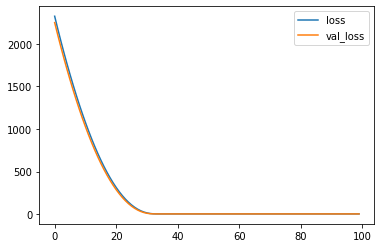

In [13]:
losses.plot()

In [18]:
pd.set_option('display.max_columns', 500)

In [19]:
df.columns

Index(['temp', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10',
       ...
       'second_50', 'second_51', 'second_52', 'second_53', 'second_54',
       'second_55', 'second_56', 'second_57', 'second_58', 'second_59'],
      dtype='object', length=171)

In [64]:
X = df.drop('temp', axis=1).values

In [66]:
newCase = "2020-03-29 01:29:27"
year = "year_" + str(int(newCase.split(" ")[0].split("-")[0]))
month ="month_" + str(int(newCase.split(" ")[0].split("-")[1]))
day = "day_" + str(int(newCase.split(" ")[0].split("-")[2]))
hour = "hour_" + str(int(newCase.split(" ")[1].split(":")[0]))
minute = "minute_" + str(int(newCase.split(" ")[1].split(":")[1]))
second = "second_" + str(int(newCase.split(" ")[1].split(":")[2]))

# print(year, month, day, hour, minute, second)

testData = df.drop('temp', axis = 1).iloc[0]
# print(testData)

for i in range(len(testData)): # reset the current row s
    testData[i]=0
testData[year] = 1
testData[month] = 1
testData[day] = 1
testData[hour] = 1
testData[minute] = 1
testData[second] = 1

model.predict(testData.values.reshape(1,-1))







array([[48.946777]], dtype=float32)

In [24]:
print(testData)

temp         50.8
day_2         0.0
day_3         0.0
day_4         0.0
day_5         0.0
             ... 
second_55     0.0
second_56     0.0
second_57     0.0
second_58     0.0
second_59     0.0
Name: 0, Length: 171, dtype: float64
